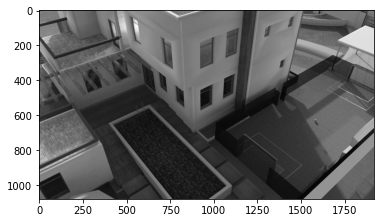

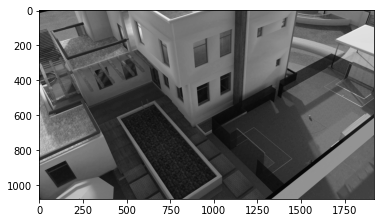

In [124]:
# import the graph
import numpy as np
import matplotlib.pyplot as plt
# import computer vision library
import cv2
# import the image
img = cv2.imread('Frame1.png')
# convert the image to grayscale
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
# display the image
plt.imshow(gray, cmap='gray')
plt.show()

img2 = cv2.imread('Frame2.png')
gray2 = cv2.cvtColor(img2, cv2.COLOR_BGR2GRAY)
plt.imshow(gray2, cmap='gray')
plt.show()




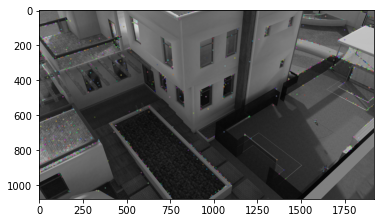

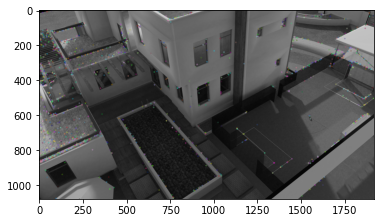

In [125]:
# detect the sailent features
sift = cv2.xfeatures2d.SIFT_create( contrastThreshold=0.045)
kp, des = sift.detectAndCompute(gray, None)
kp2, des2 = sift.detectAndCompute(gray2, None)
# draw the features
img = cv2.drawKeypoints(gray, kp, img)
img2 = cv2.drawKeypoints(gray2, kp2, img2)
# display the image
plt.imshow(img)
plt.show()
plt.imshow(img2)
plt.show()

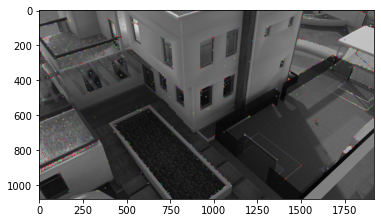

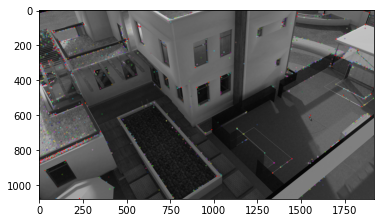

In [126]:
# detect the corners
corners = cv2.goodFeaturesToTrack(gray, 100, 0.01, 10)
corners = np.int0(corners)
for i in corners:
    x, y = i.ravel()
    cv2.circle(img, (x, y), 3, 255, -1)
plt.imshow(img)
plt.show()

# detect the corners
corners2 = cv2.goodFeaturesToTrack(gray2, 100, 0.01, 10)
corners2 = np.int0(corners2)
for i in corners2:
    x, y = i.ravel()
    cv2.circle(img2, (x, y), 3, 255, -1)
plt.imshow(img2)
plt.show()

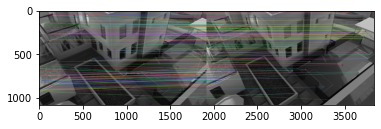

In [135]:
#match the features with nearest neighbour distance ratio
bf = cv2.BFMatcher()
matches = bf.knnMatch(des, des2, k=2)
good = []
for m, n in matches:
    if m.distance < 0.75 * n.distance:
        good.append([m])
img3 = cv2.drawMatchesKnn(gray, kp, gray2, kp2, good, None, flags=2)
plt.imshow(img3)
plt.show()


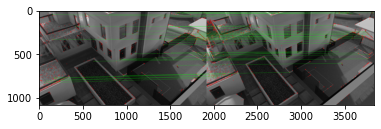

In [138]:
# match the features
bf = cv2.BFMatcher()
matches = bf.knnMatch(des, des2, k=2)
matchesMask = [[0, 0] for i in range(len(matches))]
for i, (m, n) in enumerate(matches):
    if m.distance < 0.35 * n.distance:
        matchesMask[i] = [1, 0]
draw_params = dict(matchColor=(0, 255, 0), singlePointColor=(255, 0, 0), matchesMask=matchesMask, flags=0)
img3 = cv2.drawMatchesKnn(gray, kp, gray2, kp2, matches, None, **draw_params)
plt.imshow(img3)
plt.show()

# # match the features
# bf = cv2.BFMatcher()
# matches = bf.knnMatch(des, des2, k=2)
# good = []
# for m, n in matches:
#     if m.distance < 0.75 * n.distance:
#         good.append([m])
        
# # img3 = cv2.drawMatchesKnn(gray, kp, gray2, kp2, good, None, flags=2)
# # plt.imshow(img3)
# # plt.show()

# # plot matches in the large graph
# img3 = cv2.drawMatchesKnn(gray, kp, gray2, kp2, good, None, flags=2)
# plt.imshow(img3)
# plt.show()



[[-4.52752624e-08 -1.94193534e-06  1.87298513e-03]
 [ 3.49186089e-06 -3.65921355e-07 -3.29241932e-02]
 [-2.42345385e-03  2.96681657e-02  1.00000000e+00]]


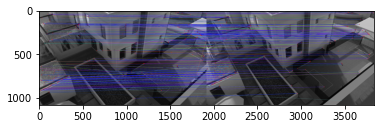

In [ ]:
# estimate the fundamental matrix 
pts1 = []
pts2 = []
for m in good:
    pts2.append(kp2[m[0].trainIdx].pt)
    pts1.append(kp[m[0].queryIdx].pt)
pts1 = np.int32(pts1)
pts2 = np.int32(pts2)
F, mask = cv2.findFundamentalMat(pts1, pts2, cv2.FM_LMEDS)
print(F)
# We select only inlier points
pts1 = pts1[mask.ravel() == 1]
pts2 = pts2[mask.ravel() == 1]
# draw the epipolar lines
for i in range(len(pts1)):
    cv2.circle(img3, (pts1[i][0], pts1[i][1]), 3, (255, 0, 0), -1)
    cv2.circle(img3, (pts2[i][0] + gray.shape[1], pts2[i][1]), 3, (255, 0, 0), -1)
    cv2.line(img3, (pts1[i][0], pts1[i][1]), (pts2[i][0] + gray.shape[1], pts2[i][1]), (0, 0, 255), 1)
plt.imshow(img3)
plt.show()





In [ ]:
# Camera1
# intrinsic matrix: [[1.600e+03, 0.000e+00, 9.595e+02], 
#  [0.000e+00, 1.600e+03, 5.395e+02], 
#  [0.000e+00, 0.000e+00, 1.000e+00]] 
# Extrinsic matrix (this is the rotation and translation [m] of Camera 1 with respect to the world coordinate system): 
# [[-6.32422984e-01, -7.74574101e-01, 8.72639567e-03, -2.36433081e+00], 
#  [-5.00836670e-01, 4.00276423e-01, -7.67425179e-01, -1.74806440e+00], 
#  [ 5.90934694e-01, -4.89707828e-01, -6.41079128e-01, 2.59576015e+01], 
#  [ 0., 0., 0., 1.]] 
# Camera2
# Camera 2 (Frame2): 
# Intrinsic matrix: 
# [[1.49333333e+03, 0.00000000e+00, 9.78700000e+02], 
#  [0.00000000e+00, 1.49333333e+03, 5.20300000e+02], 
#  [0.00000000e+00, 0.00000000e+00, 1.00000000e+00]] 
 
# Extrinsic matrix (this is the rotation and translation of Camera 2 with respect to the world 
# coordinate system): 
# [[-0.5845883, -0.81050003, -0.03669427, -2.39520617], 
#  [-0.5041514, 0.39832053, -0.76627171, -1.79913743], 
#  [ 0.6356793, -0.42945388, -0.64146805, 26.26804151], 
#  [ 0., 0., 0., 1.]] 

# Camera1
instrinsic1 = np.array([[1.600e+03, 0.000e+00, 9.595e+02],
                        [0.000e+00, 1.600e+03, 5.395e+02],
                        [0.000e+00, 0.000e+00, 1.000e+00]])

extrinsic1 = np.array([[-6.32422984e-01, -7.74574101e-01, 8.72639567e-03, -2.36433081e+00],
                          [-5.00836670e-01, 4.00276423e-01, -7.67425179e-01, -1.74806440e+00],
                            [ 5.90934694e-01, -4.89707828e-01, -6.41079128e-01, 2.59576015e+01],
                            [ 0., 0., 0., 1.]])
# Camera2   
instrinsic2 = np.array([[1.49333333e+03, 0.00000000e+00, 9.78700000e+02],
                        [0.00000000e+00, 1.49333333e+03, 5.20300000e+02],
                        [0.00000000e+00, 0.00000000e+00, 1.00000000e+00]])

extrinsic2 = np.array([[-0.5845883, -0.81050003, -0.03669427, -2.39520617],
                            [-0.5041514, 0.39832053, -0.76627171, -1.79913743],
                            [ 0.6356793, -0.42945388, -0.64146805, 26.26804151],
                            [ 0., 0., 0., 1.]])
# R_vec: 
# [[ 0.9971792 , -0.00348069, 0.07497863], 
#  [ 0.00362138, 0.99999203, -0.00174044], 
#  [-0.07497205, 0.00200697, 0.99718366]] 
 
# T_vec = [-1.98989457, 0.00265269, 0.20979508] [meters]
R_vec = np.array([[ 0.9971792 , -0.00348069, 0.07497863],
                    [ 0.00362138, 0.99999203, -0.00174044], 
                    [-0.07497205, 0.00200697, 0.99718366]])
T_vec = np.array([-1.98989457, 0.00265269, 0.20979508])

e1 = instrinsic2 @ T_vec
a = e1[0]
b = e1[1]
c = e1[2]
e2 = np.array([[0, -c, b], [c, 0, -a], [-b, a, 0]])

epipolar = instrinsic2 @ R_vec @ np.linalg.inv(instrinsic1)
F = e2 @ epipolar
print(F/F[2,2])




[[ 7.64315161e-09  1.67264739e-06 -9.48129529e-04]
 [-4.78516067e-07 -2.60194129e-08 -2.50407946e-02]
 [ 3.58785894e-04  2.20686928e-02  1.00000000e+00]]


In [ ]:
np.zeros((1, 3))

array([[0., 0., 0.]])

In [ ]:
print(1)

1


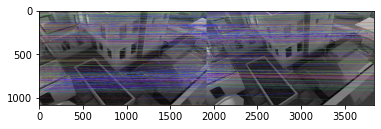

In [ ]:
# find the correctly matched points that meet the epipolar constraint
pts1 = []
pts2 = []
for m in good:
    pts2.append(kp2[m[0].trainIdx].pt)
    pts1.append(kp[m[0].queryIdx].pt)
pts1 = np.int32(pts1)
pts2 = np.int32(pts2)
# calculate the epipolar lines
lines1 = cv2.computeCorrespondEpilines(pts2.reshape(-1, 1, 2), 2, F)
lines1 = lines1.reshape(-1, 3)
lines2 = cv2.computeCorrespondEpilines(pts1.reshape(-1, 1, 2), 1, F)
lines2 = lines2.reshape(-1, 3)
# draw the epipolar lines
for i in range(len(pts1)):
    color = tuple(np.random.randint(0, 255, 3).tolist())
    x0, y0 = map(int, [0, -lines1[i][2] / lines1[i][1]])
    x1, y1 = map(int, [gray.shape[1], -(lines1[i][2] + lines1[i][0] * gray.shape[1]) / lines1[i][1]])
    cv2.line(img3, (x0, y0), (x1, y1), color, 1)
    cv2.circle(img3, (pts1[i][0], pts1[i][1]), 3, color, -1)
    x0, y0 = map(int, [0, -lines2[i][2] / lines2[i][1]])
    x1, y1 = map(int, [gray.shape[1], -(lines2[i][2] + lines2[i][0] * gray.shape[1]) / lines2[i][1]])
    cv2.line(img3, (x0 + gray.shape[1], y0), (x1 + gray.shape[1], y1), color, 1)
    cv2.circle(img3, (pts2[i][0] + gray.shape[1], pts2[i][1]), 3, color, -1)
plt.imshow(img3)
plt.show()

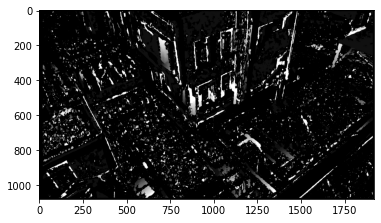

[[-4.52752624e-08 -1.94193534e-06  1.87298513e-03]
 [ 3.49186089e-06 -3.65921355e-07 -3.29241932e-02]
 [-2.42345385e-03  2.96681657e-02  1.00000000e+00]]
[[-4.52752624e-08 -1.94193534e-06  1.87298513e-03]
 [ 3.49186089e-06 -3.65921355e-07 -3.29241932e-02]
 [-2.42345385e-03  2.96681657e-02  1.00000000e+00]]
[[ 0.9955241   0.07416299 -0.05858008]
 [ 0.053643    0.06689881  0.99631671]
 [ 0.07780876 -0.9949997   0.06262105]]
[[9.98270015e-01]
 [5.87960353e-02]
 [6.60671293e-05]]


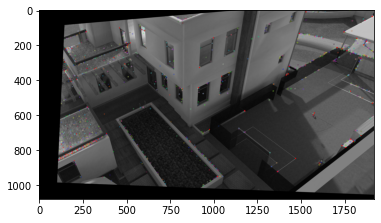

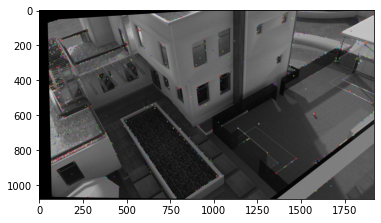

In [ ]:
# estaplish the disparity map 
stereo = cv2.StereoBM_create(numDisparities=16, blockSize=15)
disparity = stereo.compute(gray, gray2)
plt.imshow(disparity, 'gray')
plt.show()

# rectification
# find the fundamental matrix
pts1 = []
pts2 = []
for m in good:
    pts2.append(kp2[m[0].trainIdx].pt)
    pts1.append(kp[m[0].queryIdx].pt)
pts1 = np.int32(pts1)
pts2 = np.int32(pts2)
F, mask = cv2.findFundamentalMat(pts1, pts2, cv2.FM_LMEDS)
print(F)
# We select only inlier points
pts1 = pts1[mask.ravel() == 1]
pts2 = pts2[mask.ravel() == 1]
# calculate the essential matrix
K = np.array([[1.0, 0.0, 0.0], [0.0, 1.0, 0.0], [0.0, 0.0, 1.0]])
E = K.T @ F @ K
print(E)
# calculate the rotation and translation matrix
retval, R, t, mask = cv2.recoverPose(E, pts1, pts2, K)
print(R)
print(t)
# calculate the projection matrix
P1 = np.hstack((np.eye(3), np.zeros((3, 1))))
P2 = np.hstack((R, t))
# calculate the rectification matrix
retval, H1, H2 = cv2.stereoRectifyUncalibrated(pts1, pts2, F, gray.shape[::-1])
# print(H1)
# print(H2)
# rectify the images
img1_rectified = cv2.warpPerspective(img, H1, gray.shape[::-1])
img2_rectified = cv2.warpPerspective(img2, H2, gray.shape[::-1])
plt.imshow(img1_rectified)
plt.show()
plt.imshow(img2_rectified)
plt.show()
